# Implémentation d'un neurone artificiel "from scratch"

Ce notebook a pour but de démontrer comment implémenter un neurone artificiel sans utiliser de framework de deep learning (comme TensorFlow ou PyTorch). Nous allons générer un jeu de données simple, entraîner un neurone en utilisant la descente de gradient, visualiser la frontière de décision et évaluer les performances du modèle.

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
import plotly.graph_objects as go

## Génération d'un dataset

Dimensions of X: (100, 2)
Dimensions of y: (100, 1)


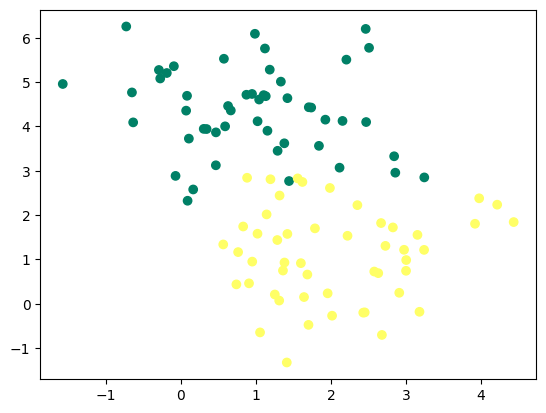

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

## Les fonctions clés

### Initialisation

In [3]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

### Modèle

In [4]:
def model(X, W, b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

### Fonction coût

In [5]:
def log_loss(A, y):
    m = len(y)
    loss = -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return loss

### Les gradients

In [6]:
def gradients(A, X, y):
    m = len(y)
    dW = 1 / m * np.dot(X.T, (A - y))
    db = 1 / m * np.sum(A - y)
    return (dW, db)

### La mise à jour des poids et biais

In [7]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### La prédiction

In [8]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A) # print the probabilities
    return A >= 0.5

## Intégration

### Le neurone

In [9]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    W, b = initialisation(X)
    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    accuracy = accuracy_score(y, y_pred)
    print("The accuracy of the model is: ", accuracy)

    plt.plot(Loss)
    plt.title("Loss")
    plt.show()

    return (W, b)

### Création du neurone et enregistement des paramètres

The accuracy of the model is:  0.89


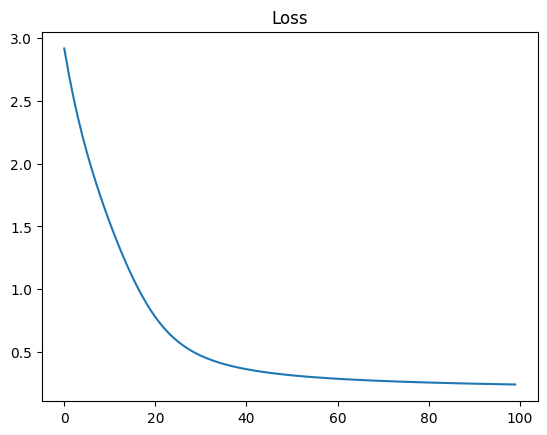

In [10]:
W, b = artificial_neuron(X, y)

### Prédiction sur une nouvelle donnée X et frontière de décision

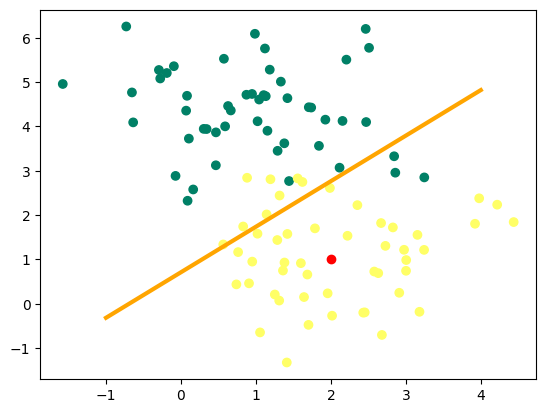

The prediction for the new data is:  Class 1


In [11]:
new_dataX = np.array([2, 1])

x0 = np.linspace(-1, 4, 100)
x1 = -(W[0] * x0 + b) / W[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_dataX[0], new_dataX[1], c='red')
plt.plot(x0, x1, color='orange', lw =3)
plt.show()

prediction = predict(new_dataX.reshape(1, -1), W, b)[0][0]
print("The prediction for the new data is: ", "Class 1" if prediction else "Class 0")

## Visualisation 3D

In [12]:
fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()

In [13]:
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = W[0] * xx0 + W[1] * xx1 + b
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))
fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))
fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()